# Making a gradient decent algorithm from scratch
This is a simple gradient decent function for a linear equation

In [1]:
import numpy as np

In [2]:
def gradient_decent(x, y, iterations = 1000, learning_rate = 0.001):
    if len(x) != len(y):
        raise Exception("X and Y lengths mismatch (X: {}, y:{})".format(len(x), len(y)))
    n = len(x)
    m_curr = b_curr = 0
    data = []
    
    for i in range(iterations):
        y_predicted = m_curr*x + b_curr
        cost = (1/n)*np.sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*np.sum(x*(y-y_predicted))
        bd = -(2/n)*np.sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        data.append(tuple([i, cost, m_curr, b_curr]))
    
    return data

##### Le data:

In [3]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.DataFrame(gradient_decent(x, y), columns=['Iteration', 'Cost', 'm', 'b'])
df.tail()

,Iteration,Cost,m,b
995,995,0.479274,2.449307,1.377859
996,996,0.478950,2.449155,1.378407
997,997,0.478626,2.449003,1.378956
998,998,0.478303,2.448851,1.379504
999,999,0.477979,2.448700,1.380052


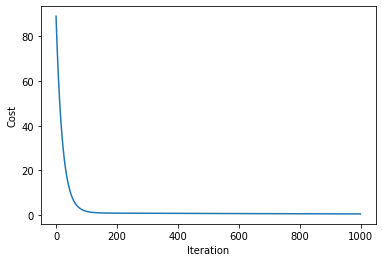

In [6]:
sns.lineplot(data=df, x='Iteration', y='Cost')

In [7]:
df[['m', 'b']].tail(1)

,m,b
999,2.4487,1.380052


When learning rate is too big the cost starts to increase

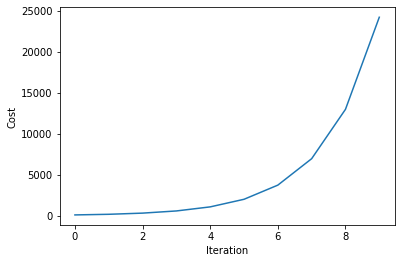

In [8]:
df = pd.DataFrame(gradient_decent(x, y, iterations=10, learning_rate=0.1), columns=['Iteration', 'Cost', 'm', 'b'])
sns.lineplot(data=df, x='Iteration', y='Cost')

In [9]:
df[['m', 'b']].tail(1)

,m,b
9,-57.112135,-15.107274


Trying a smaller learning rate

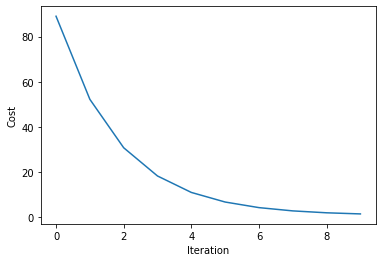

In [10]:
df = pd.DataFrame(gradient_decent(x, y, iterations=10, learning_rate=0.01), columns=['Iteration', 'Cost', 'm', 'b'])
sns.lineplot(data=df, x='Iteration', y='Cost')

In [11]:
df[['m', 'b']].tail(1)

,m,b
9,2.43158,0.754961


Seems to be decreasing, we can try a slightly larger one

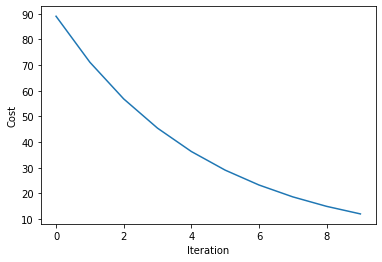

In [12]:
df = pd.DataFrame(gradient_decent(x, y, iterations=10, learning_rate=0.08), columns=['Iteration', 'Cost', 'm', 'b'])
sns.lineplot(data=df, x='Iteration', y='Cost')

In [13]:
df[['m', 'b']].tail(1)

,m,b
9,1.630886,1.038341


Lets stick with this rate and increase the iterations

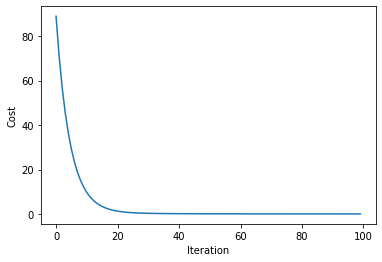

In [14]:
df = pd.DataFrame(gradient_decent(x, y, iterations=100, learning_rate=0.08), columns=['Iteration', 'Cost', 'm', 'b'])
sns.lineplot(data=df, x='Iteration', y='Cost')

In [15]:
df[['m', 'b']].tail(1)

,m,b
99,2.040516,2.8536
